### 초기설정

In [17]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [18]:
import pandas as pd

df_2018 = pd.read_excel('/content/2018.xlsx')
df_2019 = pd.read_excel('/content/2019.xlsx')
df_2020 = pd.read_excel('/content/2020.xlsx')
df_2021 = pd.read_excel('/content/2021.xlsx')
df_2022 = pd.read_excel('/content/2022.xlsx')
df_2023 = pd.read_excel('/content/2023.xlsx')
df_2024 = pd.read_excel('/content/2024.xlsx')

In [19]:
grade_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통이다': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}

df_2018['Q16'] = df_2018['Q16'].map(grade_map)

In [20]:
df_2018['국가명'] = df_2018['COUNTRY']

In [21]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

# 2018은 이미 COUNTY 컬럼에 국가명이 적혀있음.
df_2019['국가명'] = df_2019['D_COU1'].map(country_map)
df_2020['국가명'] = df_2020['D_NAT'].map(country_map)
df_2021['국가명'] = df_2021['D_NAT'].map(country_map)
df_2022['국가명'] = df_2022['D_NAT'].map(country_map)
df_2023['국가명'] = df_2023['D_NAT'].map(country_map)
df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

- 활동명 매핑 (주요활동/만족활동) - 2022~2024

In [37]:
# 1. 활동명 매핑
q4a_mapping_2022 = {
    "Q4A01": "식도락 관광", "Q4A02": "쇼핑", "Q4A03": "자연경관 감상", "Q4A04": "고궁/역사 유적지 방문",
    "Q4A05": "전통문화체험", "Q4A06": "박물관, 전시관 관람", "Q4A07": "K-POP/한류스타 공연장 방문",
    "Q4A08": "드라마/영화 촬영지 방문", "Q4A09": "연극, 뮤지컬, 발레 등 공연 관람", "Q4A10": "지역 축제 참여",
    "Q4A11": "유흥/오락", "Q4A12": "뷰티/의료관광", "Q4A13": "스포츠/레포츠 및 비즈니스 활동",
    "Q4A14": "업무수행", "Q4A15": "연수/교육/연구", "Q4A16": "시찰(산업시설 등)", "Q4A17": "기타"
}

q4b_code_mapping_2022 = {
    1: "식도락 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험", 6: "박물관, 전시관 관람", 7: "K-POP/한류스타 공연장 방문",
    8: "드라마/영화 촬영지 방문", 9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥/오락", 12: "뷰티/의료관광", 13: "스포츠/레포츠 및 비즈니스 활동",
    14: "업무수행", 15: "연수/교육/연구", 16: "시찰(산업시설 등)", 17: "기타"
}

q4a_cols = list(q4a_mapping_2022.keys())
q4b_cols = ["Q4B1", "Q4B2", "Q4B3"]

# 2. 주요활동 추출 함수
def get_q4a_activities(row):
    return [q4a_mapping_2022[col] for col in q4a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q4b_satisfaction(row):
    return [q4b_code_mapping_2022.get(int(row[col]), f"코드 {row[col]}")
            for col in q4b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2022가 정의된 상태에서만)
df_2022["주요활동"] = df_2022.apply(get_q4a_activities, axis=1)
df_2022["만족활동"] = df_2022.apply(get_q4b_satisfaction, axis=1)


In [40]:
# 1. 활동명 매핑
q8a_mapping_2023 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "고궁/역사 유적지 방문",
    "Q8a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", "Q8a06": "박물관, 전시관 관람",
    "Q8a07": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", "Q8a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q8a09": "지역 축제 참여", "Q8a10": "유흥(나이트라이프 활동 및 카지노 등)", "Q8a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a12": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a13": "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)",
    "Q8a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a15": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a16": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a17": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a18": "연수, 교육, 연구", "Q8a19": "기타"
}

q8b_code_mapping_2023 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", 6: "박물관, 전시관 관람",
    7: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", 8: "연극, 뮤지컬, 발레 등 공연 관람",
    9: "지역 축제 참여", 10: "유흥(나이트라이프 활동 및 카지노 등)",
    11: "오락(놀이공원 및 테마파크 방문 등)", 12: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    13: "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)", 14: "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    15: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)", 16: "국제회의(컨벤션, 국제회의, 전시 등)",
    17: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)", 18: "연수, 교육, 연구", 19: "기타"
}

q8a_cols = list(q8a_mapping_2023.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2023[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2023.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2023이 정의된 상태에서만)
df_2023["주요활동"] = df_2023.apply(get_q8a_activities, axis=1)
df_2023["만족활동"] = df_2023.apply(get_q8b_satisfaction, axis=1)

In [41]:
# 1. 활동명 매핑
q8a_mapping_2024 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "휴양/휴식(웰니스)",
    "Q8a05": "고궁/역사 유적지 방문", "Q8a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q8a07": "박물관, 전시관 관람", "Q8a08": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    "Q8a09": "연극, 뮤지컬, 발레 등 공연 관람", "Q8a10": "지역 축제 참여",
    "Q8a11": "유흥(나이트라이프 활동 및 카지노)", "Q8a12": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q8a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a17": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a18": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a19": "연수, 교육, 연구", "Q8a20": "기타"
}

q8b_code_mapping_2024 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "휴양/휴식(웰니스)",
    5: "고궁/역사 유적지 방문", 6: "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    7: "박물관, 전시관 관람", 8: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥(나이트라이프 활동 및 카지노)", 12: "오락(놀이공원 및 테마파크 방문 등)",
    13: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", 14: "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    15: "스포츠/레포츠 관람 (야구, 축구, 농구 등)", 16: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    17: "국제회의(컨벤션, 국제회의, 전시 등)", 18: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    19: "연수, 교육, 연구", 20: "기타"
}

q8a_cols = list(q8a_mapping_2024.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2024[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2024.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2024이 정의된 상태에서만 실행)
df_2024["주요활동"] = df_2024.apply(get_q8a_activities, axis=1)
df_2024["만족활동"] = df_2024.apply(get_q8b_satisfaction, axis=1)


## 타겟 국가의 방문 추이

| 기준        | 선택할 시장                       |
| --------- | ---------------------------- |
| 성장률이 높고   | ✅ **신흥시장 (동남아, 인도, 중동)**     |
| 소비력이 있고   | ✅ **미국, 유럽 (잠재시장)**          |
| 한류 수용성 높고 | ✅ **베트남, 태국, 인도네시아, 미국 Z세대** |

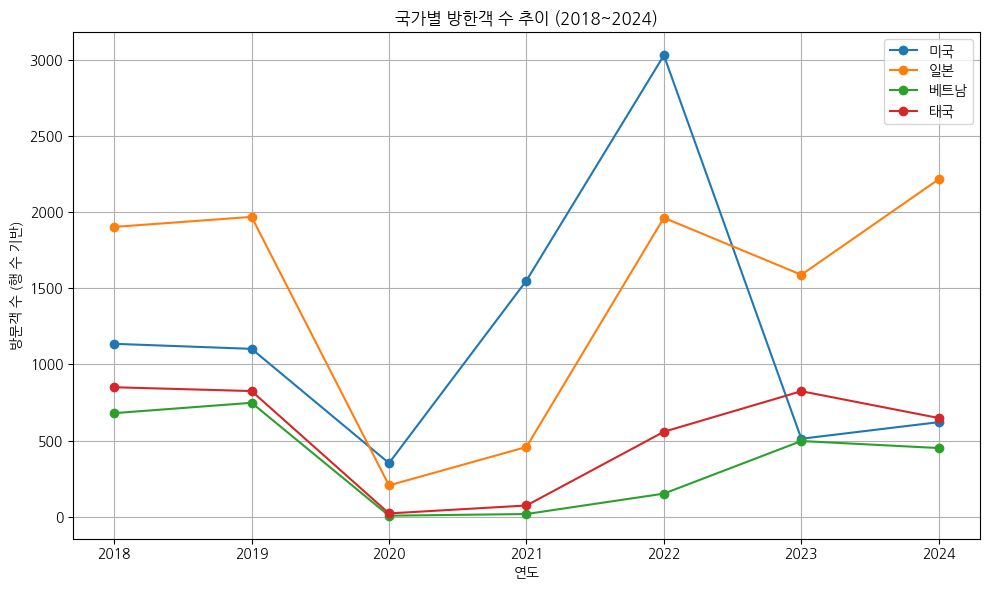

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 연도 리스트
years = list(range(2018, 2025))
# 분석 대상 국가
target_countries = ["미국", "일본", "베트남", "태국"]

# 결과 저장
records = []

for year in years:
    df = globals()[f"df_{year}"]  # df_2018, df_2019, ..., df_2024
    for country in target_countries:
        count = df[df["국가명"] == country].shape[0]
        records.append({
            "연도": year,
            "국가": country,
            "방문객수": count
        })

# 데이터프레임 변환
trend_df = pd.DataFrame(records)

# 피벗 (행: 연도 / 열: 국가 / 값: 방문객 수)
pivot_df = trend_df.pivot(index="연도", columns="국가", values="방문객수")

# 시각화
plt.figure(figsize=(10, 6))
for country in target_countries:
    if country in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[country], marker='o', label=country)

plt.title("국가별 방한객 수 추이 (2018~2024)")
plt.xlabel("연도")
plt.ylabel("방문객 수 (행 수 기반)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 시장별 추이 그래프

| 분류   | 대표 국가            | 전략 키워드                         |
| ---- | ---------------- | ------------------------------ |
| 주력시장 | 중국, 일본           | **세분화** (2·3선 도시, 테마별 타겟)      |
| 신흥시장 | 동남아, 중동, 중앙아시아 등 | **중산층 타겟 + 협업 마케팅 + K-콘텐츠 연계** |
| 잠재시장 | 미국, 유럽, 호주, 중남미  | **고소득층, 체험형 여행, 한류 기반 콘텐츠 확장** |


In [23]:
# 국가별 분류 사전
market_group = {
    "중국": "주력시장",
    "일본": "주력시장",

    # 신흥시장
    "베트남": "신흥시장",
    "태국": "신흥시장",
    "필리핀": "신흥시장",
    "인도네시아": "신흥시장",
    "말레이시아": "신흥시장",
    "인도": "신흥시장",
    "카자흐스탄": "신흥시장",
    "우즈베키스탄": "신흥시장",
    "UAE": "신흥시장",
    "사우디아라비아": "신흥시장",

    # 잠재시장 (장거리 시장)
    "미국": "잠재시장",
    "캐나다": "잠재시장",
    "영국": "잠재시장",
    "프랑스": "잠재시장",
    "독일": "잠재시장",
    "이탈리아": "잠재시장",
    "호주": "잠재시장",
    "브라질": "잠재시장",
    "멕시코": "잠재시장"
}

- 연도별로 그룹별 방문객 수 집계 (행 수 기준)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# 연도 리스트
years = list(range(2018, 2025))

# 결과 저장용 딕셔너리
group_counts = defaultdict(lambda: defaultdict(int))  # group_counts[연도][시장분류] = count

# 연도별로 순회
for year in years:
    df = globals()[f"df_{year}"]
    for country in df["국가명"]:
        group = market_group.get(country)
        if group:
            group_counts[year][group] += 1

# 데이터프레임으로 변환
records = []
for year in years:
    for group in ["주력시장", "신흥시장", "잠재시장"]:
        records.append({
            "연도": year,
            "시장": group,
            "방문객수": group_counts[year][group]
        })

df_group = pd.DataFrame(records)
pivot_df = df_group.pivot(index="연도", columns="시장", values="방문객수").fillna(0)


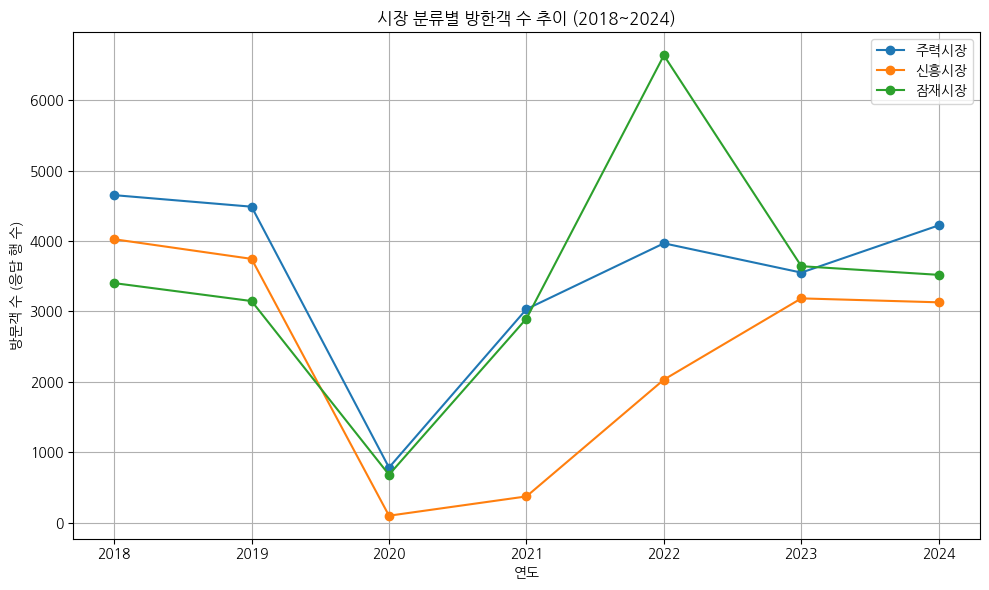

In [25]:
# 그래프 출력
plt.figure(figsize=(10, 6))
for group in ["주력시장", "신흥시장", "잠재시장"]:
    plt.plot(pivot_df.index, pivot_df[group], marker='o', label=group)

plt.title("시장 분류별 방한객 수 추이 (2018~2024)")
plt.xlabel("연도")
plt.ylabel("방문객 수 (응답 행 수)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 시장별 국가 분류

In [26]:
# 국가명을 시장 분류로 매핑
market_group = {
    # 주력시장
    "중국": "주력시장",
    "일본": "주력시장",

    # 신흥시장
    "베트남": "신흥시장",
    "태국": "신흥시장",
    "필리핀": "신흥시장",
    "인도네시아": "신흥시장",
    "말레이시아": "신흥시장",
    "인도": "신흥시장",
    "카자흐스탄": "신흥시장",
    "우즈베키스탄": "신흥시장",
    "UAE": "신흥시장",
    "사우디아라비아": "신흥시장",

    # 잠재시장
    "미국": "잠재시장",
    "캐나다": "잠재시장",
    "영국": "잠재시장",
    "프랑스": "잠재시장",
    "독일": "잠재시장",
    "이탈리아": "잠재시장",
    "호주": "잠재시장",
    "브라질": "잠재시장",
    "멕시코": "잠재시장"
}

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

years = list(range(2018, 2025))
records = []

for year in years:
    df = globals()[f"df_{year}"]
    country_counts = df["국가명"].value_counts()
    for country, count in country_counts.items():
        if country in market_group:  # 분류된 국가만 포함
            records.append({
                "연도": year,
                "국가": country,
                "시장": market_group[country],
                "방문객수": count
            })

df_country = pd.DataFrame(records)

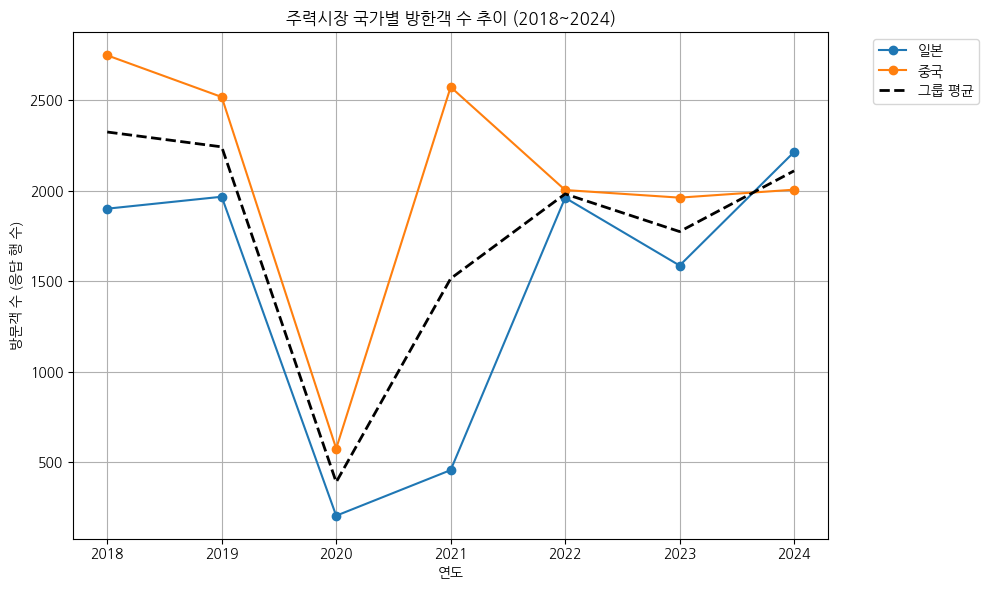

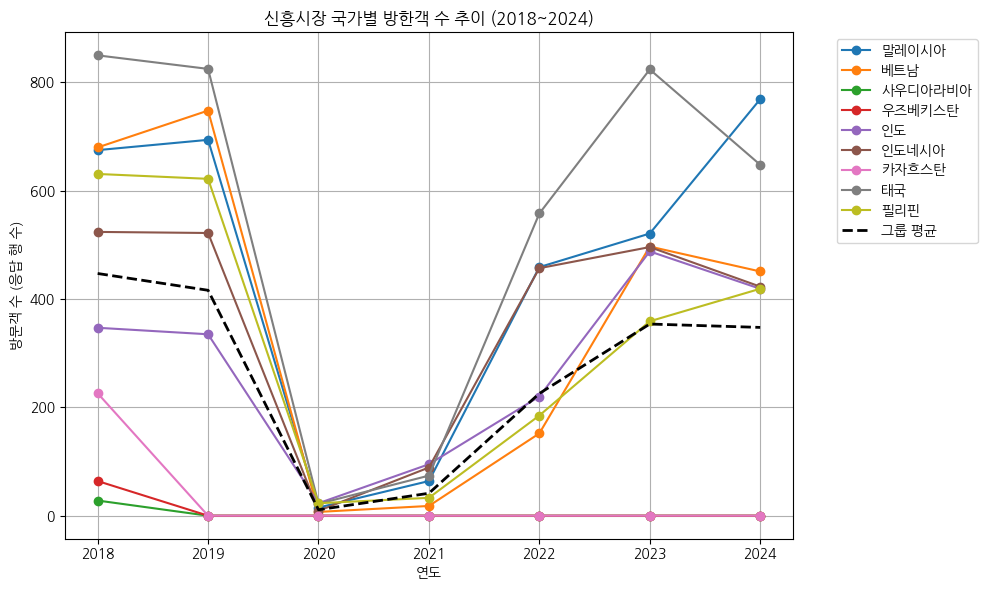

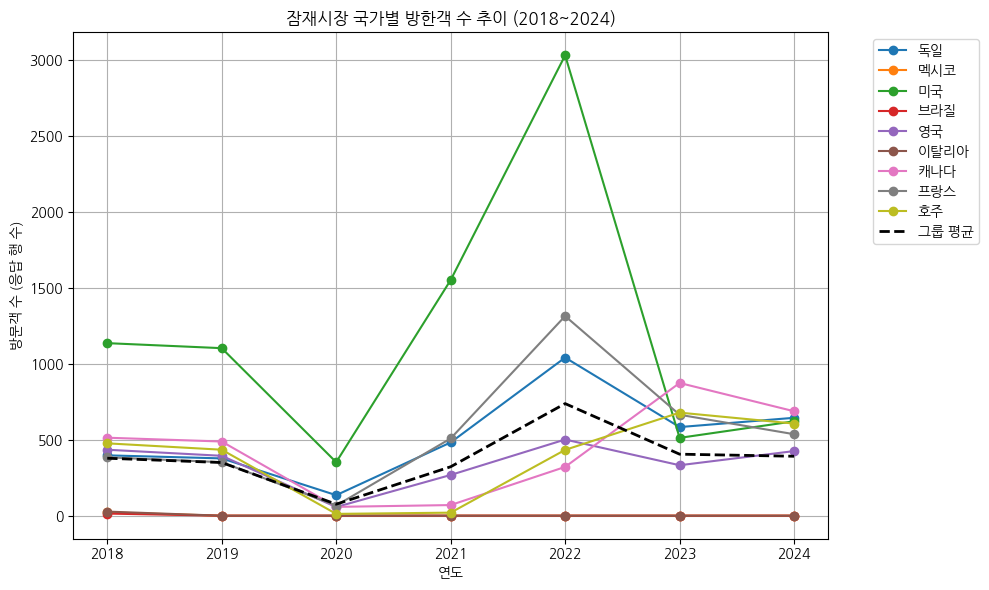

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. 시장 그룹 리스트
markets = ["주력시장", "신흥시장", "잠재시장"]

# 2. 시각화
for market in markets:
    # 해당 시장의 데이터만 추출
    df_sub = df_country[df_country["시장"] == market]

    # 피벗: 연도별 국가별 방문객 수
    pivot_df = df_sub.pivot(index="연도", columns="국가", values="방문객수").fillna(0)

    # 평균 계산
    avg_series = pivot_df.mean(axis=1)

    # 그래프 시작
    plt.figure(figsize=(10, 6))

    # 국가별 선 그래프
    for country in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[country], marker='o', label=country)

    # 평균 점선 추가
    plt.plot(avg_series.index, avg_series.values, linestyle='--', color='black', label='그룹 평균', linewidth=2)

    # 그래프 설정
    plt.title(f"{market} 국가별 방한객 수 추이 (2018~2024)")
    plt.xlabel("연도")
    plt.ylabel("방문객 수 (응답 행 수)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

- 주력시장(일본, 중국)

    기존시장으로서 안정적인 기반. 다만 성장 정체 가능성이 있어 **“체류 연장 + 소비 확장형 콘텐츠” 전략이 필요.**

    특히, 일본은 성장세

- 신흥시장 (베트남, 태국, 필리핀 등)

    집중 투자 시장은 "신흥시장 전체"가 아닌 상위 회복 국가(예: 태국, 베트남) 위주

- 잠재시장

    미국은 반짝 반등 이후 빠른 하락세,
    
    잠재시장 전체로 보면 반등력보다 회복 불안정성이 더 두드러짐
    
    장거리 시장에 대한 기대는 과도할 수 있음


    미국은 단발성 반등의 원인을 분석하고 지속 가능한 콘텐츠 연계 강화 필요

    유럽은 장기 체류 중심으로 로열티 기반 프로그램 설계가 더 타당

### 시장 분석 인사이트

1. **기존 주력시장(중국·일본)**은 가장 빠르게 회복했고,
    특히 일본은 코로나 이전 수준에 근접하거나 회복을 초과한 모습도 보인다.
    
    다만 추가 성장 여력은 크지 않으며,
    
    체류일수·소비 확대·지방 분산 등 질적 전략 전환이 필요한 시점이다.

2. 신흥시장은 “고소득 중동”이 아니라 동남아 MZ층 중심 회복 중이다.


3. 잠재시장인 미국은 일시 반등 이후 하락세로, 장기적 유입 전략 재설계가 필요하다.


4. 시장 전체를 묶어 마케팅하기보다는, 국가 단위 선별 전략이 효율적이다.



-> 미국은 왜 갑자기 2022년 이후 감소했을까?

## 2021~2024, 미국 응답자 기준 재방문의사

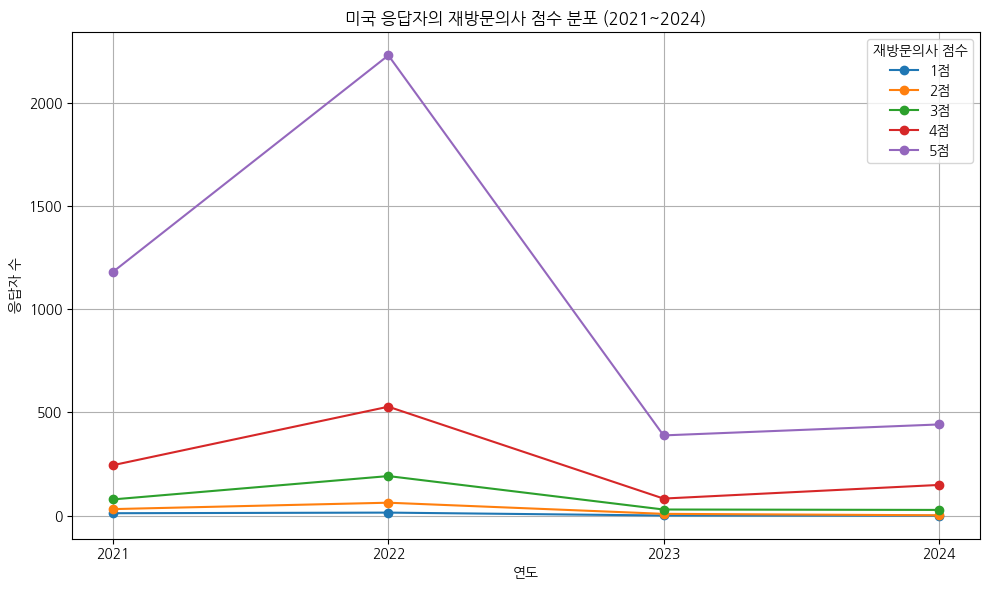

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 연도별 컬럼 매핑
year_question_map = {
    2021: ("df_2021", "Q8"),
    2022: ("df_2022", "Q8"),
    2023: ("df_2023", "Q13"),
    2024: ("df_2024", "Q13"),
}

# 점수 분포 저장
score_records = []

for year, (df_name, q_col) in year_question_map.items():
    df = globals()[df_name]

    # 미국 응답자 필터링
    df_us = df[df["국가명"] == "미국"]

    # 유효 점수만 (1~5)
    valid_scores = df_us[q_col][df_us[q_col].isin([1,2,3,4,5])]

    counts = valid_scores.value_counts().sort_index()

    for score in range(1, 6):
        score_records.append({
            "연도": year,
            "점수": score,
            "응답자수": counts.get(score, 0)
        })

# 데이터프레임 생성
df_score = pd.DataFrame(score_records)

# 시각화
plt.figure(figsize=(10, 6))
for score in range(1, 6):
    subset = df_score[df_score["점수"] == score]
    plt.plot(subset["연도"], subset["응답자수"], marker='o', label=f"{score}점")

plt.title("미국 응답자의 재방문의사 점수 분포 (2021~2024)")
plt.xlabel("연도")
plt.ylabel("응답자 수")
plt.xticks([2021, 2022, 2023, 2024])
plt.legend(title="재방문의사 점수")
plt.grid(True)
plt.tight_layout()
plt.show()


한류 콘텐츠에 끌려 1차 방문 → 기대 대비 실망

**재방문 의사 응답은 충성도보다는 '정서적 반응'**에 가까웠을 가능성

**팬데믹 이후 첫 해외여행의 ‘로망 효과’**가 꺼진 이후, 경쟁력 약화

## 코로나 이후 회복세 TOP20 국가

In [34]:
import pandas as pd

# 연도 리스트 및 DataFrame 매핑
years = list(range(2018, 2025))
dfs = [globals()[f"df_{year}"] for year in years]

# 연도별 국가별 방문객 수 계산
records = []
for year, df in zip(years, dfs):
    counts = df["국가명"].value_counts()
    for country, count in counts.items():
        records.append({
            "연도": year,
            "국가": country,
            "방문객수": count
        })

# 방문객 수 데이터프레임
df_country = pd.DataFrame(records)

# 코로나 이전 평균 (2018~2020)
pre_covid = df_country[df_country["연도"].between(2018, 2020)].groupby("국가")["방문객수"].mean().rename("pre_avg")

# 코로나 이후 평균 (2023~2024)
post_covid = df_country[df_country["연도"].between(2023, 2024)].groupby("국가")["방문객수"].mean().rename("post_avg")

# 병합 후 회복률 계산
recovery = pd.concat([pre_covid, post_covid], axis=1).dropna()
recovery["회복률"] = recovery["post_avg"] / recovery["pre_avg"]

# 회복률 기준 TOP 20
top20 = recovery.sort_values("회복률", ascending=False).head(20)

# 결과 출력
print("코로나 이후 회복률 기준 TOP 20 국가")
print(top20)

코로나 이후 회복률 기준 TOP 20 국가
           pre_avg  post_avg       회복률
국가                                    
싱가포르    379.000000    1318.0  3.477573
프랑스     267.666667     600.0  2.241594
캐나다     353.000000     780.0  2.209632
호주      307.333333     642.0  2.088937
기타      309.000000     644.5  2.085761
독일      303.000000     613.5  2.024752
홍콩      657.333333    1281.5  1.949544
인도      235.000000     453.5  1.929787
중동      333.500000     584.5  1.752624
일본     1358.666667    1901.5  1.399534
말레이시아   461.333333     645.0  1.398121
러시아     396.333333     536.5  1.353659
몽골      271.000000     366.0  1.350554
인도네시아   351.666667     459.5  1.306635
태국      565.666667     736.0  1.301120
영국      295.000000     378.5  1.283051
대만      813.666667     851.0  1.045883
중국     1948.333333    1985.0  1.018820
베트남     478.333333     474.0  0.990941
필리핀     425.333333     389.0  0.914577


### 회복세 인사이트

🔹1. 초고속 회복 시장

  싱가포르, 프랑스, 캐나다, 호주 등은
  팬데믹 이전보다 2배 이상 방문객 증가

  → 고소득 장거리 시장 집중 전략 타당

🔹 2. 정책 부합 성장 시장

  일본, 인도, 중동, 말레이시아 등은
  회복률 1.3배 이상으로 정부 전략과 부합

🔹 3. 기대 대비 정체 시장 (신흥시장으로 주목받던)

  베트남, 필리핀은 회복률 1.0 미만, 팬데믹 이전 수준도 회복 못함
  
  → 전략 재조정 또는 선별 투자 필요

## 먼저 미국의 이탈 이유 살펴봄

### 방문율이 급감했던 2022년부터 2024년까지 비교



#### **재방문의사와 참여 및 만족 활동**

- 재방문 의사 3점

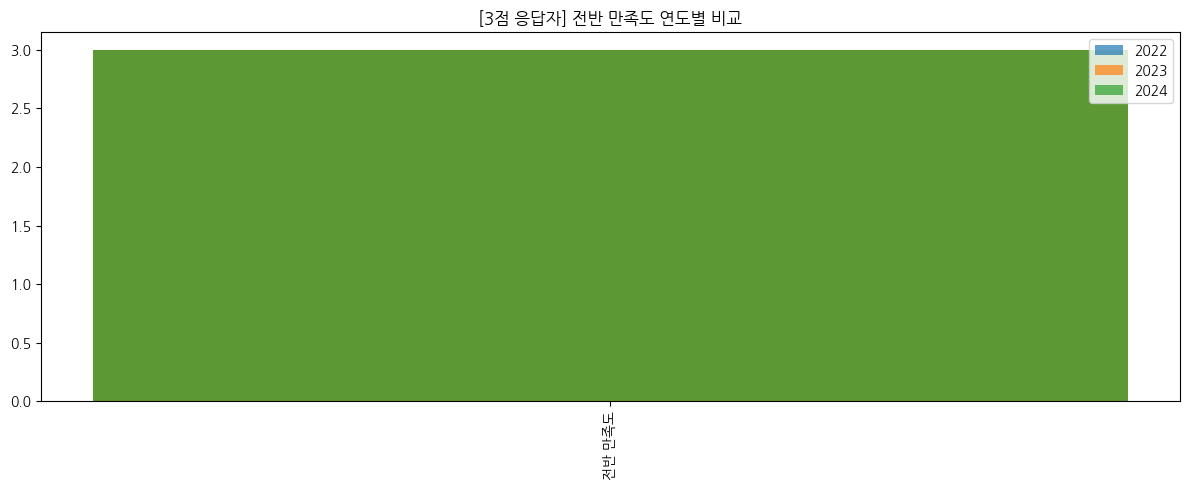

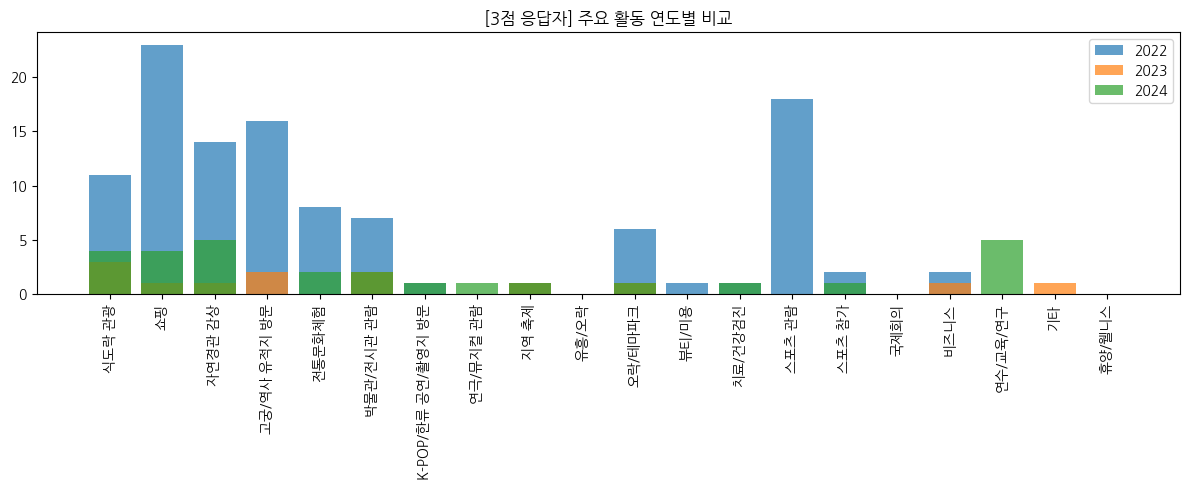

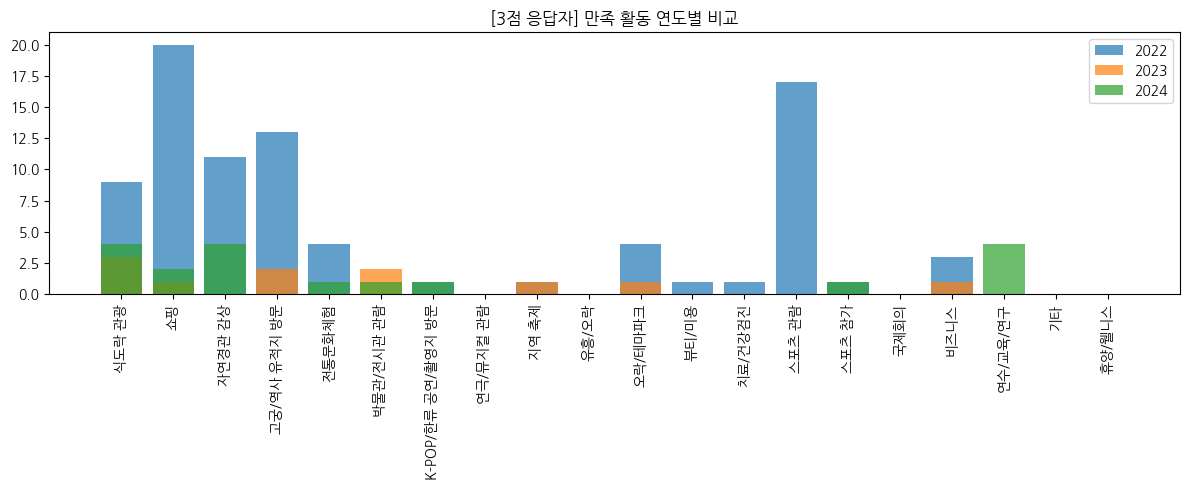

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 점수 설정
target_score = 3

# 활동명 매핑
activity_labels = {
    1: "식도락 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험", 6: "박물관/전시관 관람", 7: "K-POP/한류 공연/촬영지 방문",
    8: "연극/뮤지컬 관람", 9: "지역 축제", 10: "유흥/오락",
    11: "오락/테마파크", 12: "뷰티/미용", 13: "치료/건강검진",
    14: "스포츠 관람", 15: "스포츠 참가", 16: "국제회의", 17: "비즈니스",
    18: "연수/교육/연구", 19: "기타", 20: "휴양/웰니스"
}

# 연도별 구성
analysis_config = {
    2022: {
        "df": df_2022,
        "satisfaction_col": "Q7",
        "activity_cols": [f"Q4A{str(i).zfill(2)}" for i in range(1, 18)],
        "satisfying_cols": [f"Q4B{i}" for i in range(1, 4)],
        "activity_max": 17
    },
    2023: {
        "df": df_2023,
        "satisfaction_col": "Q11",
        "activity_cols": [f"Q8a{str(i).zfill(2)}" for i in range(1, 20)],
        "satisfying_cols": [f"Q8_1a{i}" for i in range(1, 4)],
        "activity_max": 19
    },
    2024: {
        "df": df_2024,
        "satisfaction_col": "Q11",
        "activity_cols": [f"Q8a{str(i).zfill(2)}" for i in range(1, 21)],
        "satisfying_cols": [f"Q8_1a{i}" for i in range(1, 4)],
        "activity_max": 20
    },
}

# 저장
records = []

for year, cfg in analysis_config.items():
    df = cfg["df"]
    sat_col = cfg["satisfaction_col"]
    df_target = df[(df["국가명"] == "미국") & (df[sat_col] == target_score)]
    total = len(df_target)

    # 1. 전반 만족도
    records.append({
        "분석": "전반 만족도",
        "연도": year,
        "항목": "전반 만족도",
        "값": df_target[sat_col].mean()
    })

    # 2. 주요 활동
    for i, col in enumerate(cfg["activity_cols"], 1):
        if i > cfg["activity_max"]:
            continue
        count = df_target[col].notna().sum()
        name = activity_labels.get(i, f"활동{i}")
        records.append({
            "분석": "주요 활동",
            "연도": year,
            "항목": name,
            "값": count
        })

    # 3. 만족 활동
    satisfied = df_target[cfg["satisfying_cols"]].stack().astype("Int64")
    for i in range(1, cfg["activity_max"] + 1):
        count = (satisfied == i).sum()
        name = activity_labels.get(i, f"활동{i}")
        records.append({
            "분석": "만족 활동",
            "연도": year,
            "항목": name,
            "값": count
        })

df_plot_3 = pd.DataFrame(records)

# 그래프 출력 (3단계)
for 분석 in ["전반 만족도", "주요 활동", "만족 활동"]:
    subset = df_plot_3[df_plot_3["분석"] == 분석]
    plt.figure(figsize=(12, 5))
    for year in sorted(subset["연도"].unique()):
        data = subset[subset["연도"] == year]
        plt.bar(data["항목"], data["값"], label=f"{year}", alpha=0.7)
    plt.title(f"[{target_score}점 응답자] {분석} 연도별 비교")
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

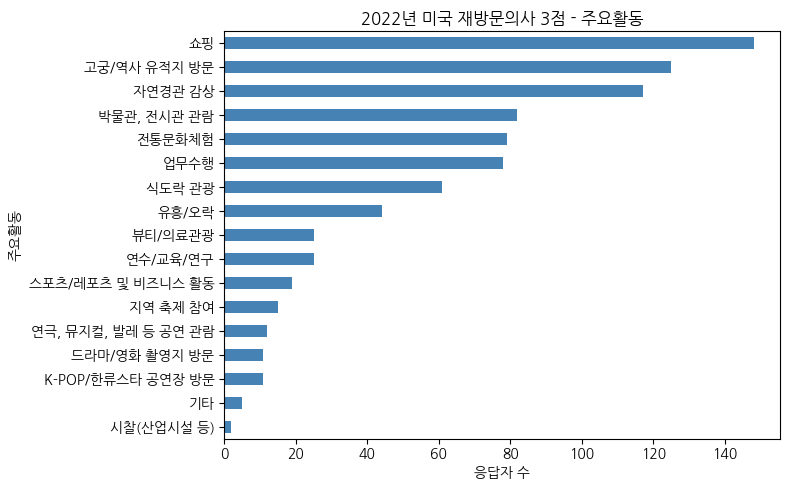

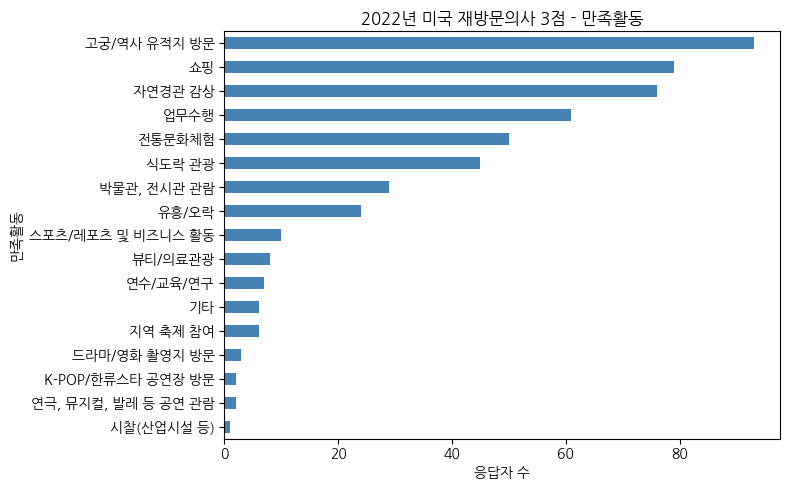

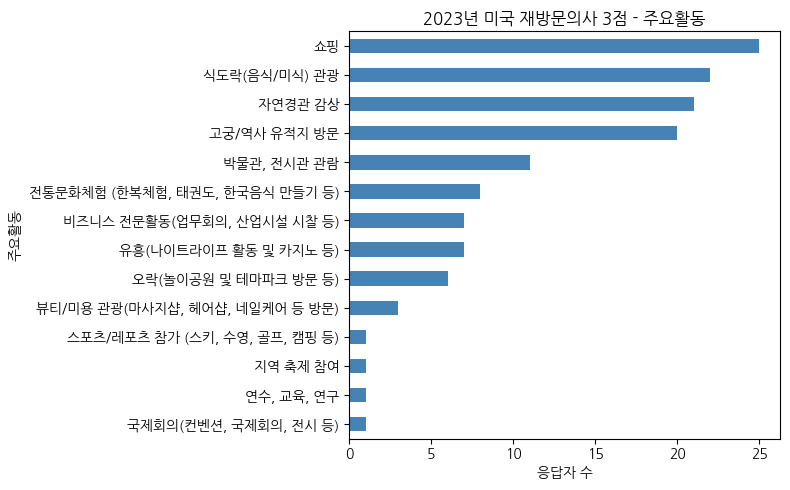

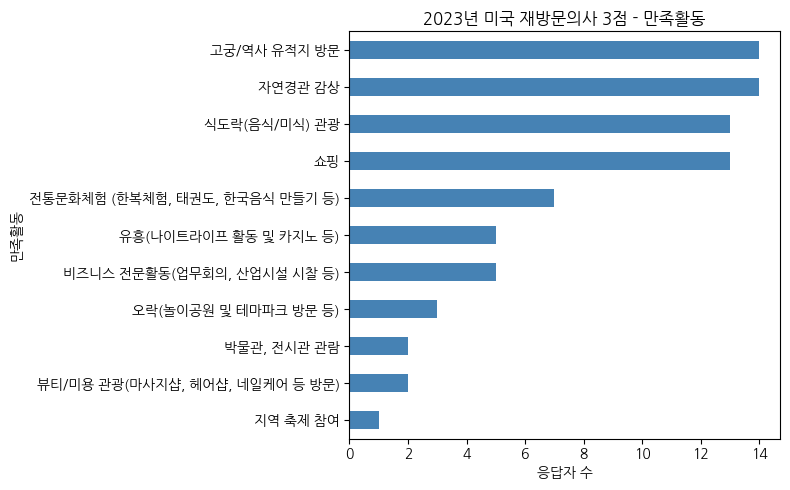

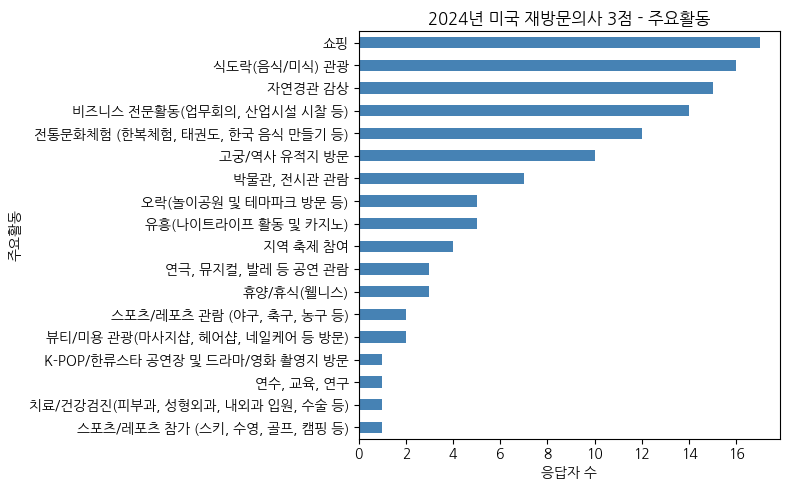

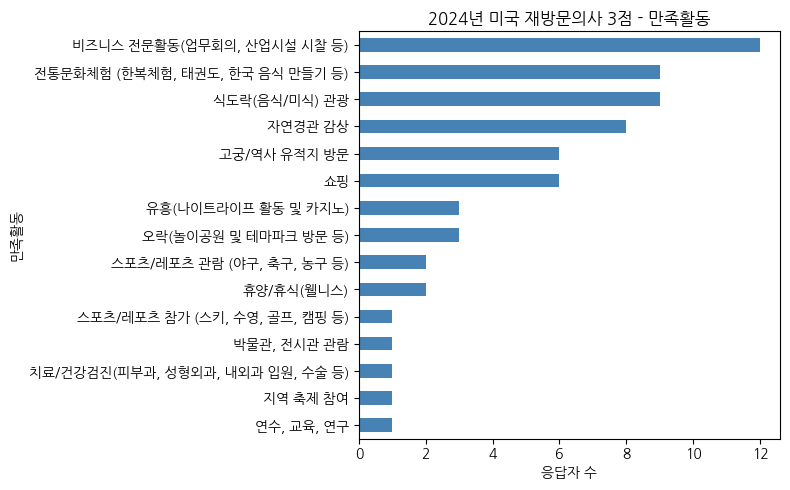

In [42]:
import matplotlib.pyplot as plt

# 연도별 미국 데이터 필터링
df_us_2022 = df_2022[df_2022["국가명"] == "미국"].copy()
df_us_2023 = df_2023[df_2023["국가명"] == "미국"].copy()
df_us_2024 = df_2024[df_2024["국가명"] == "미국"].copy()

# 점수 컬럼 정의
score_col_by_year = {
    2022: "Q8",
    2023: "Q13",
    2024: "Q13"
}

# 활동 컬럼 정의
activity_cols = {
    "main": "주요활동",
    "satisf": "만족활동"
}

# 그래프 함수 정의
def plot_activity_comparison_by_score(year, score, kind="main"):
    df = {2022: df_us_2022, 2023: df_us_2023, 2024: df_us_2024}[year]
    score_col = score_col_by_year[year]
    activity_col = activity_cols[kind]

    df_score = df[df[score_col] == score]
    activity_counts = df_score[activity_col].explode().value_counts().sort_values()

    plt.figure(figsize=(8, 5))
    activity_counts.plot(kind='barh', color="#4682B4")
    plt.title(f"{year}년 미국 재방문의사 {score}점 - {'주요활동' if kind=='main' else '만족활동'}")
    plt.xlabel("응답자 수")
    plt.tight_layout()
    plt.show()

# ✅ 예시 실행 (3점)
plot_activity_comparison_by_score(2022, 3, kind="main")
plot_activity_comparison_by_score(2022, 3, kind="satisf")

plot_activity_comparison_by_score(2023, 3, kind="main")
plot_activity_comparison_by_score(2023, 3, kind="satisf")

plot_activity_comparison_by_score(2024, 3, kind="main")
plot_activity_comparison_by_score(2024, 3, kind="satisf")


- 재방문 점수 4점

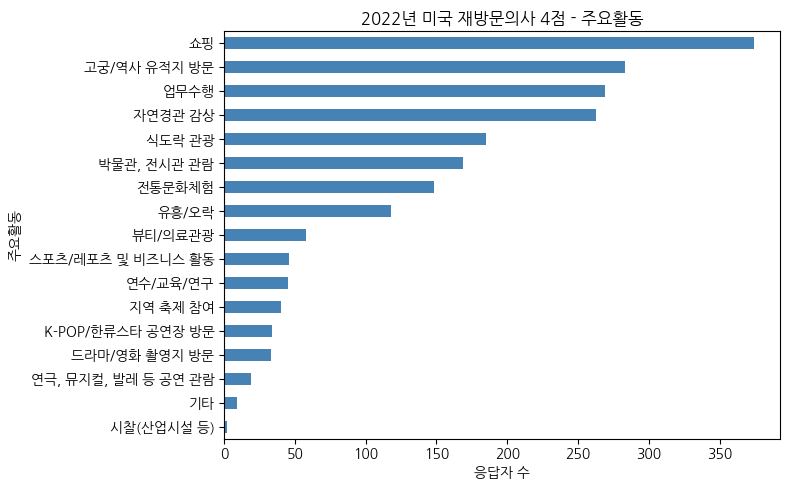

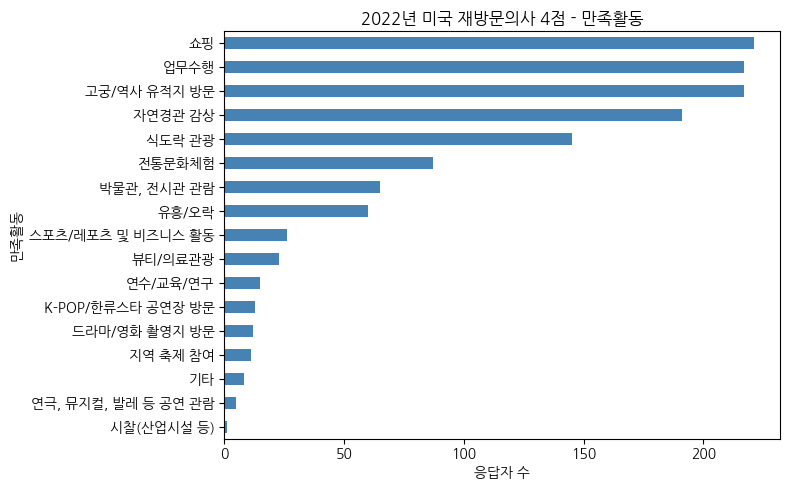

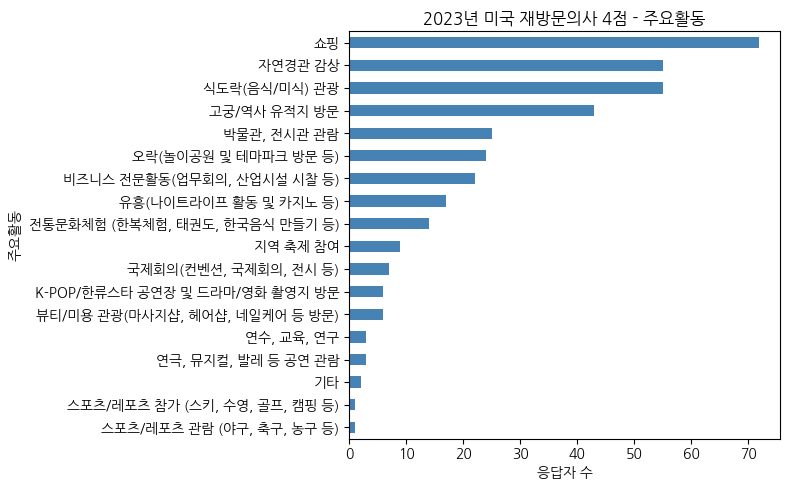

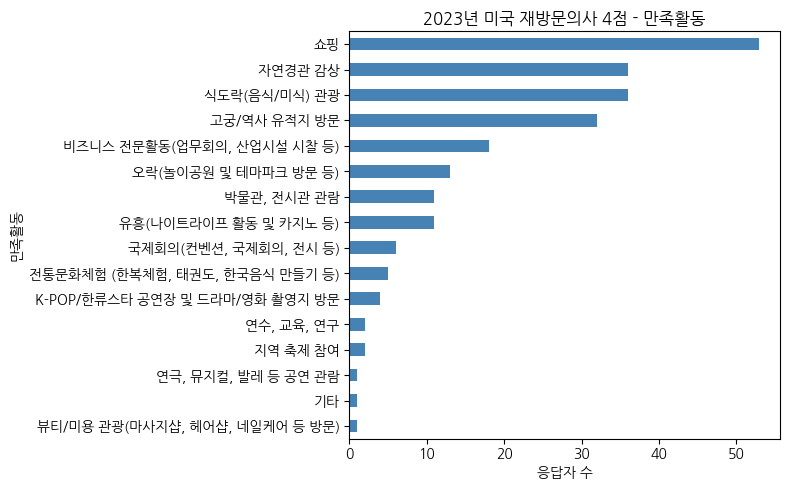

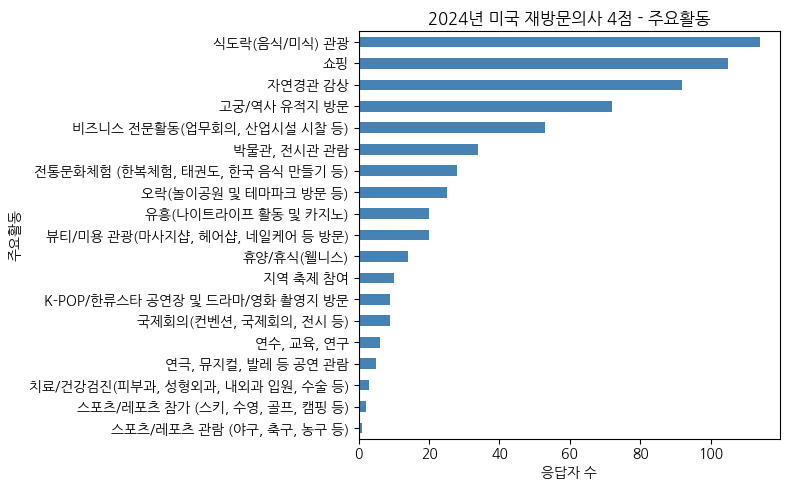

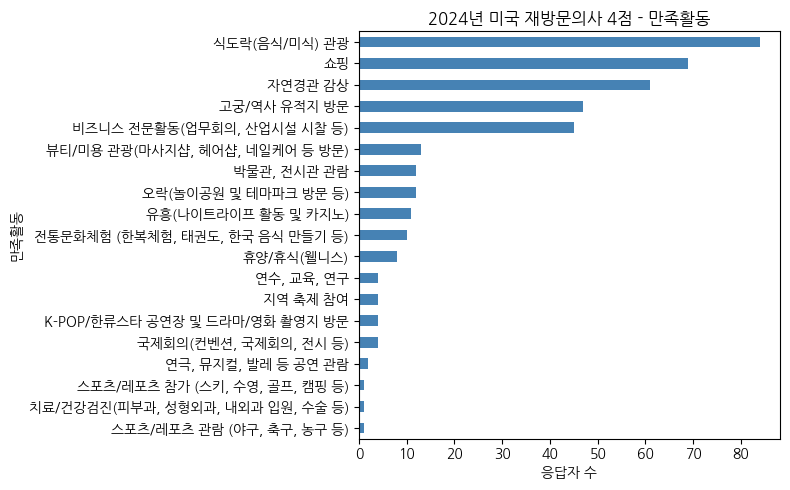

In [43]:
# 미국 재방문 의사 4점 그룹 - 연도별 주요활동 & 만족활동 그래프

# 2022년
plot_activity_comparison_by_score(2022, 4, kind="main")
plot_activity_comparison_by_score(2022, 4, kind="satisf")

# 2023년
plot_activity_comparison_by_score(2023, 4, kind="main")
plot_activity_comparison_by_score(2023, 4, kind="satisf")

# 2024년
plot_activity_comparison_by_score(2024, 4, kind="main")
plot_activity_comparison_by_score(2024, 4, kind="satisf")


- 재방문 5점

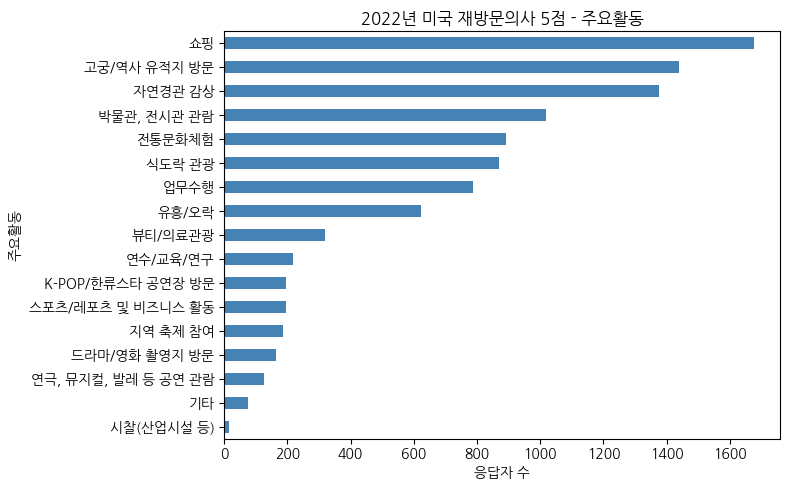

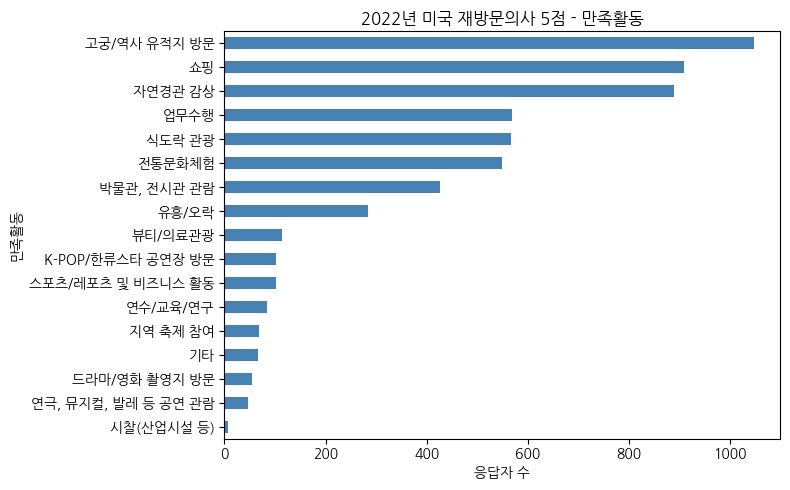

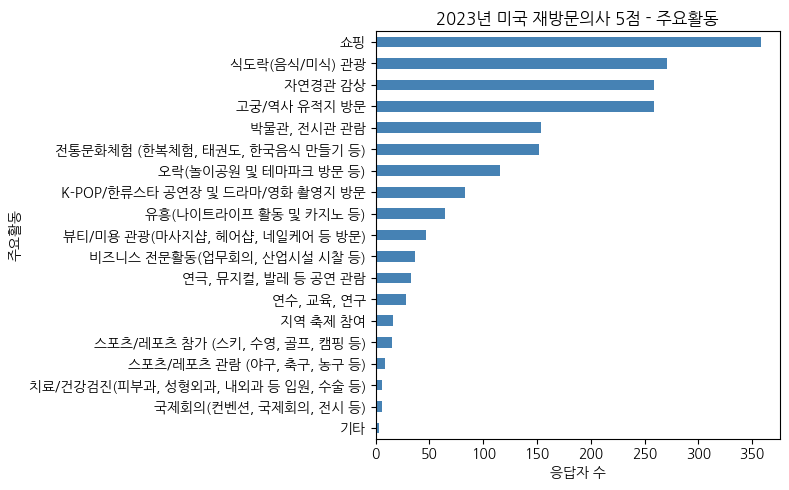

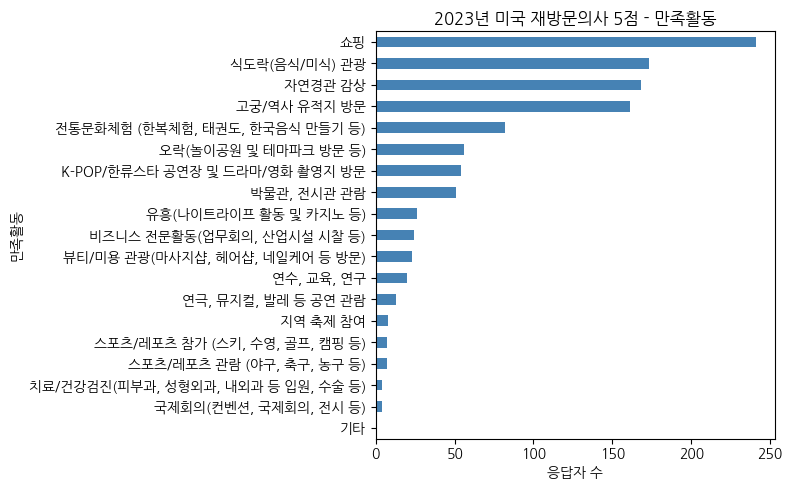

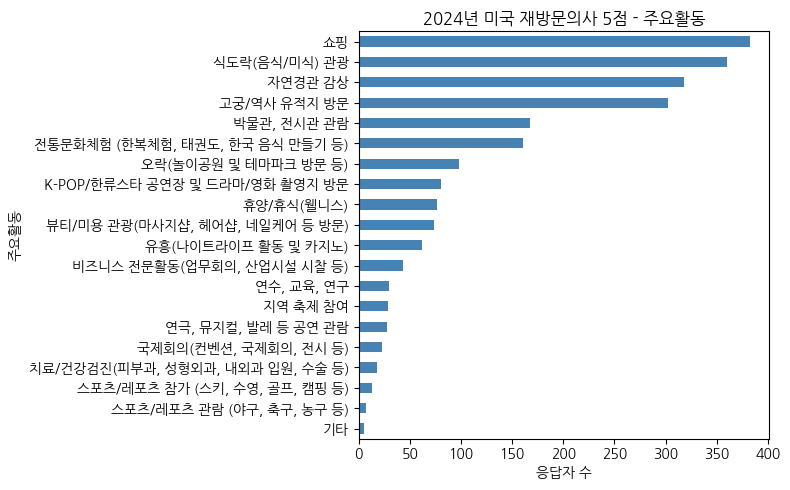

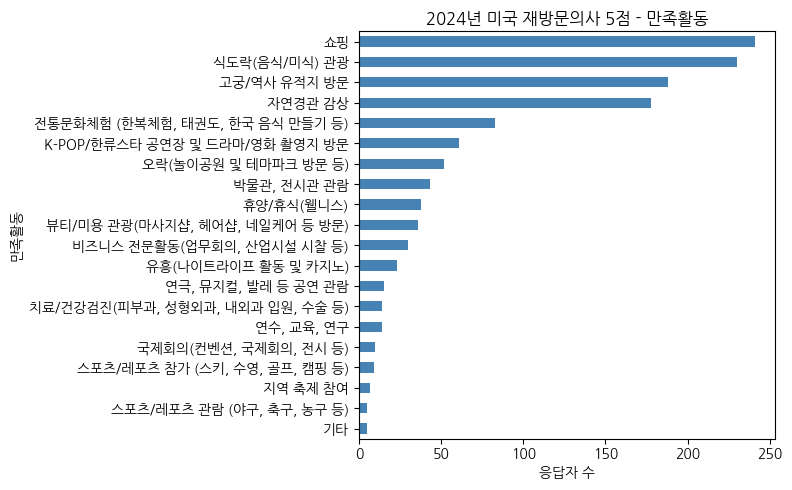

In [44]:
# 미국 재방문 의사 5점 그룹 - 연도별 주요활동 & 만족활동 그래프

# 2022년
plot_activity_comparison_by_score(2022, 5, kind="main")
plot_activity_comparison_by_score(2022, 5, kind="satisf")

# 2023년
plot_activity_comparison_by_score(2023, 5, kind="main")
plot_activity_comparison_by_score(2023, 5, kind="satisf")

# 2024년
plot_activity_comparison_by_score(2024, 5, kind="main")
plot_activity_comparison_by_score(2024, 5, kind="satisf")

- 누적그래프로 보기 좋게 비교

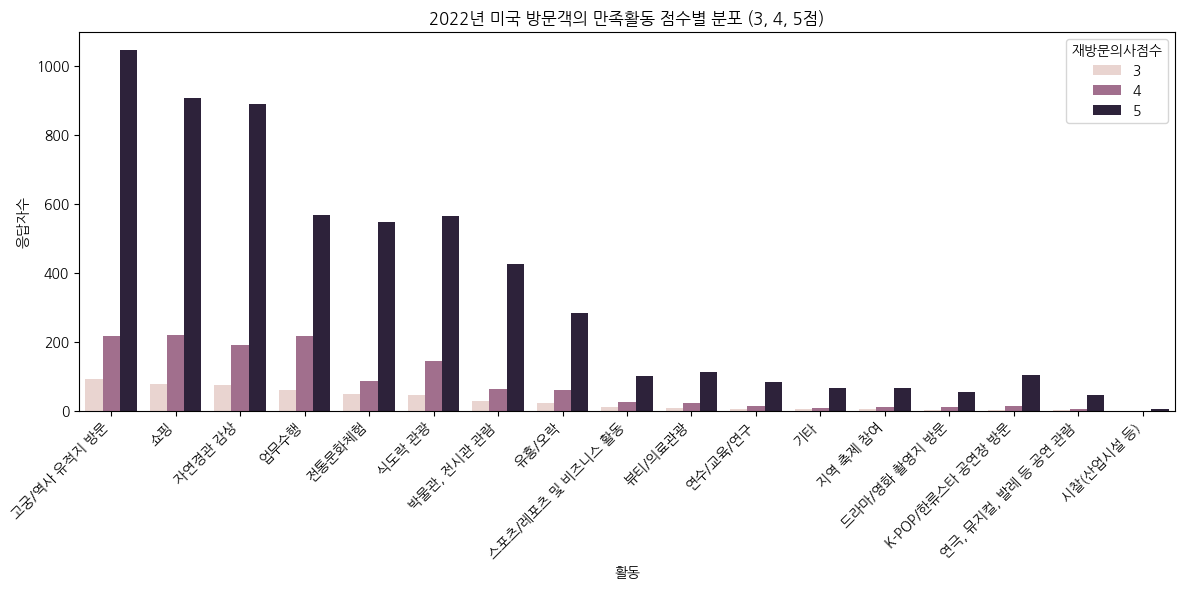

In [46]:
# --------- 2022년 ---------
df_us_2022 = df_2022[df_2022["국가명"] == "미국"].copy()
df_us_2022 = df_us_2022[df_us_2022["Q8"].isin([3, 4, 5])]

records_2022 = []
for score in [3, 4, 5]:
    temp = df_us_2022[df_us_2022["Q8"] == score]["만족활동"].explode().value_counts()
    for activity, count in temp.items():
        records_2022.append({"재방문의사점수": score, "활동": activity, "응답자수": count})

df_plot_2022 = pd.DataFrame(records_2022)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_2022, x="활동", y="응답자수", hue="재방문의사점수")
plt.title("2022년 미국 방문객의 만족활동 점수별 분포 (3, 4, 5점)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 1. 2022년: 압도적인 5점 만족
    → '한국 전통+문화 핵심요소'에 집중

    5점 응답자 수 자체가 매우 많음 → 2022년은 팬데믹 이후 미국 방문자가 폭발적으로 증가한 시점.

        가장 높은 만족 활동 (5점 기준):
        - 고궁/역사 유적지 방문
        - 쇼핑
        - 자연경관 감상
        - 식도락 관광
        - 박물관/전시관 관람
        - K-POP/한류 관련 항목은 상대적으로 낮음
        - 전통적 관광 콘텐츠에 높은 만족도가 집중됨.

➤ 의미: 이 시기 미국 방문객은 '한국 전통문화/자연'에 깊이 반응했고, 전통적인 활동이 재방문 의향을 크게 높였음.

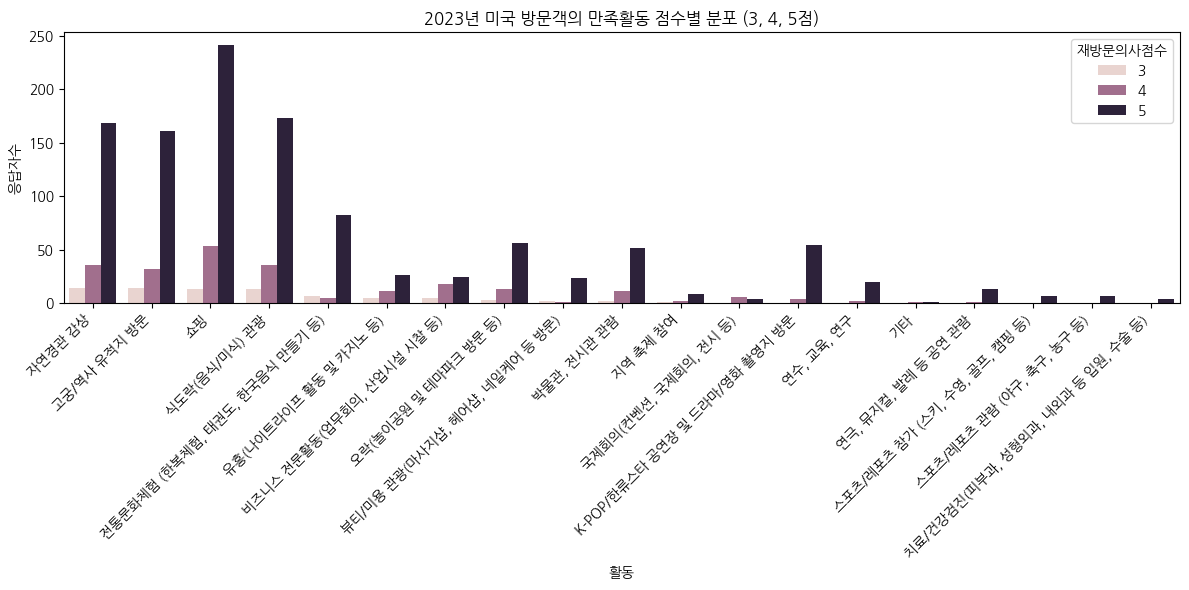

In [47]:
# --------- 2023년 ---------
df_us_2023 = df_2023[df_2023["국가명"] == "미국"].copy()
df_us_2023 = df_us_2023[df_us_2023["Q13"].isin([3, 4, 5])]

records_2023 = []
for score in [3, 4, 5]:
    temp = df_us_2023[df_us_2023["Q13"] == score]["만족활동"].explode().value_counts()
    for activity, count in temp.items():
        records_2023.append({"재방문의사점수": score, "활동": activity, "응답자수": count})

df_plot_2023 = pd.DataFrame(records_2023)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_2023, x="활동", y="응답자수", hue="재방문의사점수")
plt.title("2023년 미국 방문객의 만족활동 점수별 분포 (3, 4, 5점)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. 2023년: 5점 응답자 급감 → 트렌드 다변화, 하지만 만족도 분산

  전체 응답자 수 감소 + 5점 응답자 급감

  가장 큰 하락폭을 보인 년도, 전통 강세 활동은 유지되나 영향력 축소됨.

        주요 만족 활동:
        - 식도락 관광
        - 고궁/역사 유적지
        - 쇼핑, 자연경관 감상

        "기타 활동(뷰티, 공연 등)"은 여전히 낮음.

➤ 의미: 2023년은 팬데믹 반등 후 다양한 활동이 시도되었으나, 확고한 핵심 만족 활동 없이 분산됨 → 재방문 유도력 약화.

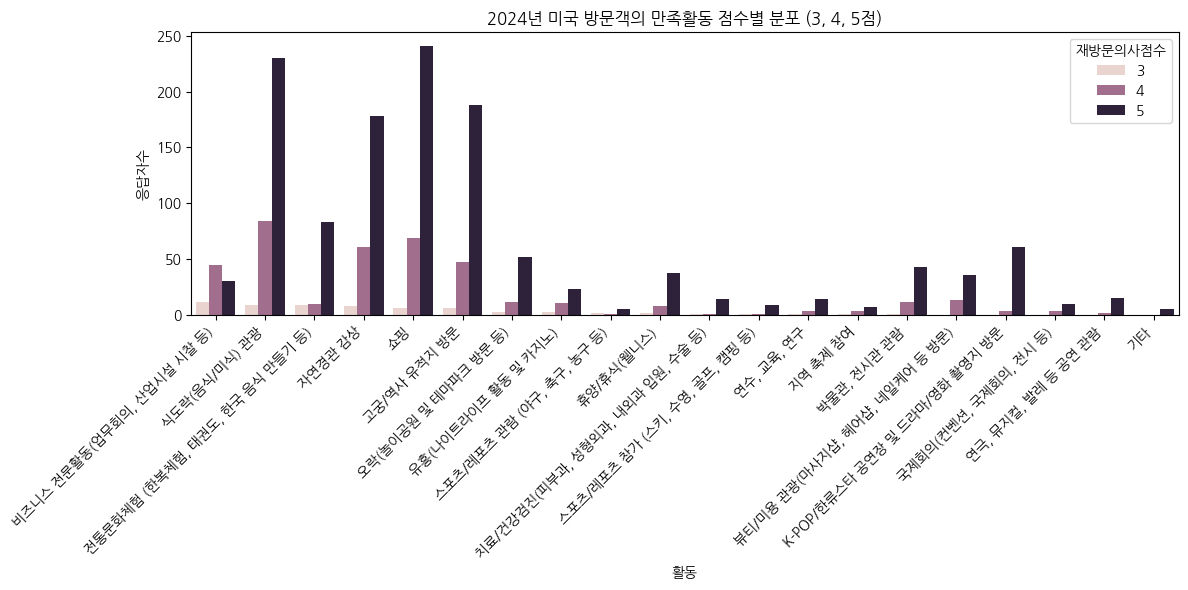

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. 2024년 미국 데이터만 필터링
df_us_2024 = df_2024[df_2024["국가명"] == "미국"].copy()
df_us_2024 = df_us_2024[df_us_2024["Q13"].isin([3, 4, 5])]

# 2. 점수별로 만족활동 분해해서 카운트
records = []
for score in [3, 4, 5]:
    temp = df_us_2024[df_us_2024["Q13"] == score]["만족활동"].explode().value_counts()
    for activity, count in temp.items():
        records.append({"재방문의사점수": score, "활동": activity, "응답자수": count})

df_plot = pd.DataFrame(records)

# 3. 시각화 - 그룹형 세로 막대그래프
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x="활동", y="응답자수", hue="재방문의사점수")
plt.title("2024년 미국 방문객의 만족활동 점수별 분포 (3, 4, 5점)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


2024년: 회복세 보이지만 2022년 수준에는 못 미침
전체 응답자 수 약간 회복, 5점 만족도 증가

      * 강세 활동 유지:

      쇼핑 / 식도락 / 자연경관 / 고궁/역사 유적지


      * 새롭게 떠오르는 만족 활동:

      테마파크 / 오락 / 웰니스 (소폭 증가)

      K-POP/한류, 드라마 촬영지는 여전히 낮은 만족도

➤ 의미: 미국 방문객은 다시금 안정적 관광(쇼핑/식도락 등)에 만족하고 있으며, 일부 **웰니스 트렌드**가 반영됨. 다만 2022년처럼 '몰입형 만족 활동'은 줄어듦.

#### 그래서 왜 줄었을까?

- 엔저·달러 강세로 유럽·일본 경쟁심화 → 한국보다 더 “싸고 다양한 여행지” 선택 가능

- 미국 내 물가 상승, 장거리 여행 축소 트렌드 → 경제적 이유로 아시아 여행 포기

### 제안

**2022년의 만족 포인트(전통문화/자연/식도락)**를 기반으로

Z세대 트렌드 (예: 스마트 여행, 웰니스, 개인 맞춤형 루트)와 결합된 신상품 개발 필요

K-콘텐츠 중심 마케팅 전략은 현재 미국 시장에서는 상대적으로 약한 매력도 → 보완 필요

# 컬럼 코드

**재방문의사**

- 2021, 2022 → Q8 (1~5점)

- 2023, 2024 → Q13 (1~5점)

**1. 2022년**
1) 한국여행에 대한 전반적인 만족도  Q7(1-5점)

2) 주요 참여 활동  Q4A01 ~ Q4A17 / 만족한 활동 Q4B1 ~ Q4B3

    1: 식도락 관광
    2: 쇼핑
    3: 자연경관 감상
    4: 고궁/역사 유적지 방문
    5: 전통문화체험
    6: 박물관, 전시관 관람
    7: K-POP/한류스타 관련 공연장 방문
    8: 드라마/영화 촬영지 방문
    9: 연극, 뮤지컬, 발레 등 공연 관람
    10: 지역 축제 참여
    11: 유흥/오락
    12: 뷰티/의료관광
    13: 스포츠/레포츠 관람 및 참가 비즈니스 활동
    14: 업무수행
    15: 연수/교육/연구
    16: 시찰(산업시설 등)
    17: 기타




**2. 2023년**

1) 전반적 만족도 Q11(1~5점)

2) 참여한 활동 Q8a01 ~ Q8a19 / 만족한 활동 Q8_1a1 ~ Q8_1a3


      1 식도락(음식/미식) 관광
      2 쇼핑
      3 자연경관 감상
      4 고궁/역사 유적지 방문
      5 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)
      6 박물관, 전시관 관람
      7 K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문
      8 연극, 뮤지컬, 발레 등 공연 관람
      9 지역 축제 참여
      10 유흥(나이트라이프 활동 및 카지노 등)
      11 오락(놀이공원 및 테마파크 방문 등)
      12 뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)
      13 치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)
      14 스포츠/레포츠 관람 (야구, 축구, 농구 등)
      15 스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등)
      16 국제회의(컨벤션, 국제회의, 전시 등)
      17 비즈니스 전문활동(업무회의, 산업시설 시찰 등)
      18 연수, 교육, 연구
      19 기타



**3. 2024년**

1) 전반적 만족도 Q11(1~5점)

2)참여한 활동 Q8a01 ~ Q8a20 / 만족한 활동 Q8_1a1 ~ Q8_1a3

      1 식도락(음식/미식) 관광
      2 쇼핑
      3 자연경관 감상
      4 휴양/휴식(웰니스)
      5 고궁/역사 유적지 방문
      6 전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)
      7 박물관, 전시관 관람
      8 K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문
      9 연극, 뮤지컬, 발레 등 공연 관람
      10 지역 축제 참여
      11 유흥(나이트라이프 활동 및 카지노)
      12 오락(놀이공원 및 테마파크 방문 등
      13 뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)
      14 치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)
      15 스포츠/레포츠 관람 (야구, 축구, 농구 등)
      16 스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등)
      17 국제회의(컨벤션, 국제회의, 전시 등)
      18 비즈니스 전문활동(업무회의, 산업시설 시찰 등)
      19 연수, 교육, 연구
      20 기타